c:\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Epoch 1/50
469/469 - 2s - loss: 0.0891 - accuracy: 0.1564 - val_loss: 0.0862 - val_accuracy: 0.2525 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0831 - accuracy: 0.3306 - val_loss: 0.0795 - val_accuracy: 0.4087 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0762 - accuracy: 0.4800 - val_loss: 0.0722 - val_accuracy: 0.5752 - 2s/epoch - 3ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0688 - accuracy: 0.6083 - val_loss: 0.0647 - val_accuracy: 0.6399 - 2s/epoch - 3ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0616 - accuracy: 0.6538 - val_loss: 0.0577 - val_accuracy: 0.6776 - 2s/epoch - 3ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0553 - accuracy: 0.6893 - val_loss: 0.0519 - val_accuracy: 0.7181 - 2s/epoch - 3ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0502 - accuracy: 0.7264 - val_loss: 0.0473 - val_accuracy: 0.7499 - 2s/epoch - 3ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0462 - accuracy: 0.7516 - val_loss: 0.0436 - val_accuracy: 0.7720 - 2s/epoch - 3ms/step
Epoch 9/50
469/469 - 2s 

Epoch 18/50
469/469 - 3s - loss: 5.0693e-04 - accuracy: 0.9974 - val_loss: 0.0029 - val_accuracy: 0.9813 - 3s/epoch - 6ms/step
Epoch 19/50
469/469 - 3s - loss: 4.9443e-04 - accuracy: 0.9976 - val_loss: 0.0029 - val_accuracy: 0.9803 - 3s/epoch - 6ms/step
Epoch 20/50
469/469 - 3s - loss: 4.3730e-04 - accuracy: 0.9980 - val_loss: 0.0029 - val_accuracy: 0.9814 - 3s/epoch - 6ms/step
Epoch 21/50
469/469 - 3s - loss: 4.4361e-04 - accuracy: 0.9977 - val_loss: 0.0034 - val_accuracy: 0.9784 - 3s/epoch - 6ms/step
Epoch 22/50
469/469 - 3s - loss: 6.0435e-04 - accuracy: 0.9968 - val_loss: 0.0031 - val_accuracy: 0.9796 - 3s/epoch - 6ms/step
Epoch 23/50
469/469 - 3s - loss: 4.3566e-04 - accuracy: 0.9977 - val_loss: 0.0029 - val_accuracy: 0.9818 - 3s/epoch - 6ms/step
Epoch 24/50
469/469 - 3s - loss: 3.1782e-04 - accuracy: 0.9984 - val_loss: 0.0027 - val_accuracy: 0.9828 - 3s/epoch - 6ms/step
Epoch 25/50
469/469 - 3s - loss: 2.8450e-04 - accuracy: 0.9987 - val_loss: 0.0028 - val_accuracy: 0.9822 - 3s/e

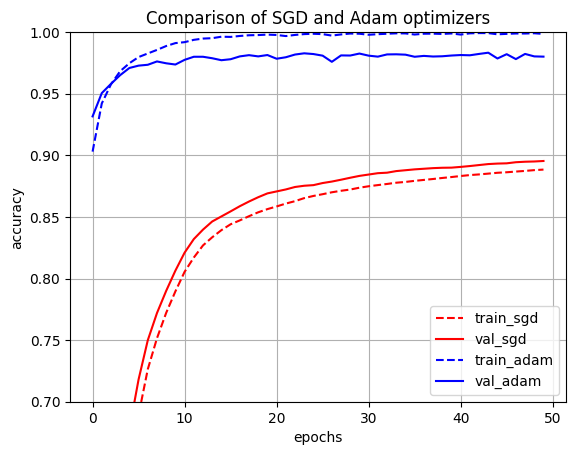

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()